<a href="https://colab.research.google.com/github/hoonzi-s/hongong_MLDL/blob/main/06-3.%20%EC%A3%BC%EC%84%B1%EB%B6%84%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (주성분 분석)

In [ ]:
!wget https://bit.ly/fruits_300_data

--2022-03-29 01:42:58--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-29 01:42:58--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-29 01:42:59--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... c

In [ ]:
import numpy as np
fruits = np.load('fruits_300_data')
fruits_2d = fruits.reshape(-1, 10000)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)
pca.components_.shape

(50, 10000)

In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n :
        axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
      axs[i, j].axis('off')
  plt.show()

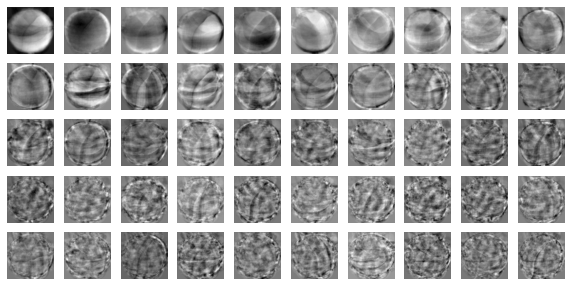

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
fruits_2d.shape

(300, 10000)

In [ ]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

# 원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

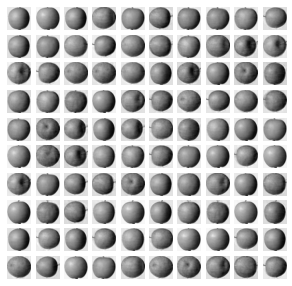

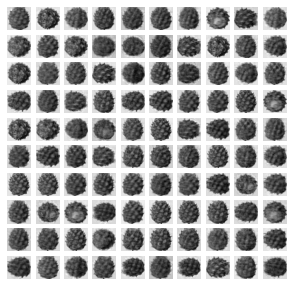

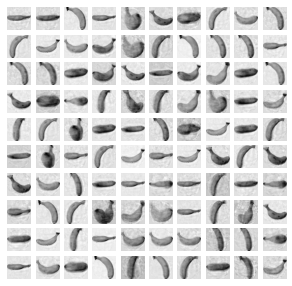

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100], ratio = 0.5)


# 설명된 분산

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9215327606802965

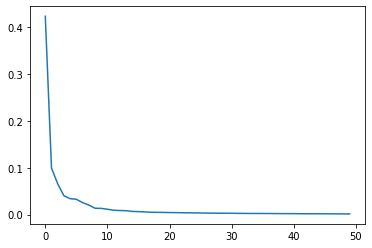

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511202, 0.00486383, 0.00480346,
       0.00447836, 0.00437314, 0.00408036, 0.00389437, 0.00372438,
       0.00359277, 0.00331464, 0.00317789, 0.00304317, 0.00303773,
       0.00288718, 0.00275627, 0.00264997, 0.00255923, 0.00252162,
       0.00247198, 0.00239592, 0.00230762, 0.00221722, 0.00216351,
       0.00213731, 0.00196372, 0.00192872, 0.00190865, 0.00185126,
       0.00182212, 0.00173577, 0.00168398, 0.001625  , 0.00156865])

In [ ]:
for i in range(0, 41, 10):
  print(f'{i}:{i+10}', np.sum(pca.explained_variance_ratio_[i:i+10]))

0:10 0.7694928940201907
10:20 0.07216735374953073
20:30 0.03671682096399173
30:40 0.024930522300284738
40:50 0.018225169646298597


# 다른 알고리즘과 함께 사용하기

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target, return_train_score = True)
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.9966666666666667
1.7479455947875977


In [ ]:
scores = cross_validate(lr, fruits_pca, target, return_train_score = True)
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
1.0
0.05752120018005371


In [ ]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)
pca.n_components_

2

In [ ]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [ ]:
scores = cross_validate(lr, fruits_pca, target, return_train_score = True)
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1.0
0.9933333333333334
0.08623247146606446


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts = True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

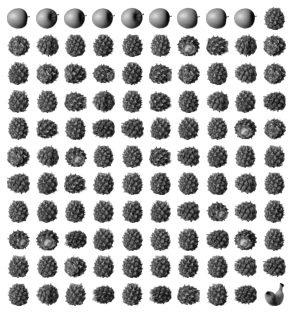

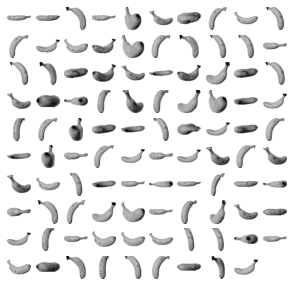

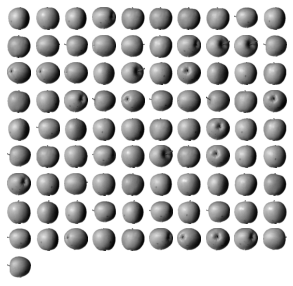

In [ ]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label], ratio = 0.5)

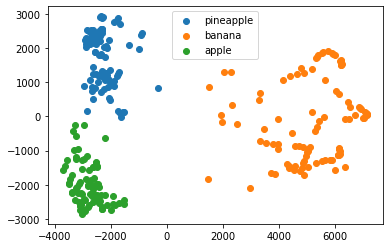

In [ ]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()